# 📊 Project 7: A Machine Learning Journey
**Author:** Sabriya Sowers
🔗 [GitHub Repository](https://github.com/ssowers2/datafun-07-applied)

### Python Libraries Imports

In [17]:
# Required imports for project
import sys
import os
import IPython
import numpy as np
import pandas as pd
import pyarrow as pa
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pkg_resources
import sklearn
from importlib.metadata import version
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

# Confirm imports loaded 
print("Imports loaded successfully!")

Imports loaded successfully!


### Verify Package Versions

In [18]:
# Check and print the versions of installed packages
print("Python Version:", sys.version)  # Python interpreter version
print("OS Version:", os.name)  # Operating system name
print("IPython Version:", IPython.__version__)  # Interactive Python shell version

# Core scientific and data processing libraries
print("NumPy Version:", np.__version__)  # Numerical computing library
print("Pandas Version:", pd.__version__)  # Data analysis and manipulation
print("PyArrow Version:", pa.__version__)  # Apache Arrow for efficient data handling
print("SciPy Version:", scipy.__version__)  # Scientific computing library

# Data visualization libraries
print("Matplotlib Version:", plt.matplotlib.__version__)  # Plotting library
print("Seaborn Version:", sns.__version__)  # Statistical data visualization

# Natural Language Processing (NLP) libraries
print("NLTK Version:", nltk.__version__)  # Natural language processing toolkit
print("TextBlob Version:", version("textblob")) # Text processing and sentiment analysis

# Machine Learning library
print("Scikit-learn Version:", sklearn.__version__)  # Machine learning tools

Python Version: 3.13.1 (tags/v3.13.1:0671451, Dec  3 2024, 19:06:28) [MSC v.1942 64 bit (AMD64)]
OS Version: nt
IPython Version: 8.32.0
NumPy Version: 2.2.3
Pandas Version: 2.2.3
PyArrow Version: 19.0.0
SciPy Version: 1.15.2
Matplotlib Version: 3.10.0
Seaborn Version: 0.13.2
NLTK Version: 3.9.1
TextBlob Version: 0.19.0
Scikit-learn Version: 1.6.1


## Part 1: Chart a Straight Line

### Step 1: Define the Conversion Formula

In [19]:
# Define the lambda function for Fahrenheit to Celsius conversion
c = lambda f: 5 / 9 * (f - 32)

# Create a list of tuples (Fahrenheit, Celsius)
temps = [(f, c(f)) for f in range (0, 101, 10)]

print(temps)

[(0, -17.77777777777778), (10, -12.222222222222223), (20, -6.666666666666667), (30, -1.1111111111111112), (40, 4.444444444444445), (50, 10.0), (60, 15.555555555555557), (70, 21.11111111111111), (80, 26.666666666666668), (90, 32.22222222222222), (100, 37.77777777777778)]


### Step 2: Generate Data Points

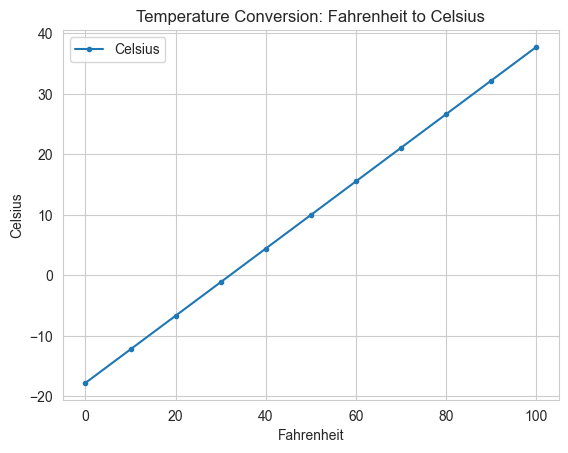

In [20]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

# Graph Title ";" removes text above chart
axes.set_title("Temperature Conversion: Fahrenheit to Celsius");  

## Part 2: Predict Avg High Temp in NYC in January

### Step 1: Data Aquisition

In [21]:
# Loads dataset
nyc_df = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')


### Step 2: Data Inspection

In [22]:
# Display the first 3 rows of the dataset to check the structure and column names
display(nyc_df.head(3))  

# Display the last 3 rows to verify data consistency and completeness
display(nyc_df.tail(3))

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


,Date,Value,Anomaly
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Step 3: Data Cleaning

In [23]:
# Renaming columns for better readability
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Check the data type of the 'Date' column to ensure it's numeric
nyc_df.Date.dtype

#Convert YYYYMM to YYYY (truncate last two digits)
nyc_df.Date = nyc_df.Date.floordiv(100)

#
display(nyc_df.head(3))

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Step 4: Descriptive Statistics

In [24]:
#Calculating basic descriptive stats for the dataset
pd.set_option('display.precision', 2)

# Display temperature stats
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Step 5: Build the Model

In [25]:
# forecasting future January average high temperatures
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

display(linear_regression.slope)

display(linear_regression.intercept)

# Predict the average high temp for 2024
forecast_2024 = linear_regression.slope * 2024 + linear_regression.intercept

np.float64(0.014771361132966163)

np.float64(8.694993233674289)

### Step 6: Visualization


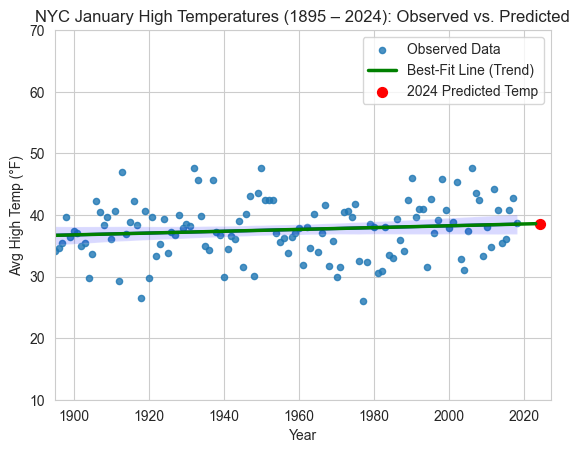

Predicted Average High Temperature for January 2024: 38.59°F


In [26]:
# SciPy Model: Uses slope and intercept attributes

# forecasting future January average high temperatures
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

# Generate an extended range of years. Extends past 2024 for clarity
extended_years = np.arange(nyc_df.Date.min(), 2024)  

# Predicted line
predicted_temps = linear_regression.slope * extended_years + linear_regression.intercept  

# Set Seaborn style
sns.set_style('whitegrid')

# Create the regression plot for observed temperature data
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature, scatter_kws={"s": 20}, line_kws={"color": "blue"}, label="Observed Data")

# Plot the regression line manually so it extends to 2024
plt.plot(extended_years, predicted_temps, color='green', linestyle='-', linewidth=2.5, label="Best-Fit Line (Trend)")

# Plot the predicted temperature for 2024 as a red dot so it stands out
plt.scatter(2024, forecast_2024, color='red', marker='o', s=50, label='2024 Predicted Temp')

# # Set X and Y limits
plt.xlim(nyc_df.Date.min(), 2027)  # Extended slightly beyond 2024 to set the prediction clearly
plt.ylim(10, 70)

# Add Title & Labels
plt.title('NYC January High Temperatures (1895 – 2024): Observed vs. Predicted')  
plt.xlabel("Year")
plt.ylabel("Avg High Temp (°F)")

# Show legend
plt.legend();

# Show plot
plt.show()

# Print the predicted temperature for 2024
print(f"Predicted Average High Temperature for January 2024: {forecast_2024:.2f}°F")

# type(linear_regression)

## Part 3 - Predict Avg High Temp in NYC in January

### Step 1: Training the Model

In [27]:
X_train, X_test, y_train, y_test = train_test_split (
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values, random_state=11
)

# Shows the number of rows and columns in X_train (training data for features).
display(X_train.shape)

# Shows the number of rows and columns in (test data for features).
display(X_test.shape)

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

# To print the book's output because with the above alone it didn't print. Per AI this difference happens because scikit-learn updated how it displays model parameters in version 1.0+.
print(linear_regression.get_params()) 

# To print the slope in the "m" part of the equation y = mx + b
display(linear_regression.coef_)

# To print the intercept in the "b" part of the equation y = mx + b
display(linear_regression.intercept_)

(93, 1)

(31, 1)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


array([0.01939167])

np.float64(-0.30779820252656975)

### Step 2: Testing the Model

In [28]:
# This code compares the model’s predictions to the actual values for temperature.

# Uses the trained model (linear_regression) to predict temperatures based on X_test (the test set of years). Stores the predictions in predicted variable.
predicted = linear_regression.predict(X_test)

# Stores the true actual temperatures from y_test in expected variable for comparison.
expected = y_test

#  Loops every 5th element ([::5]) from predicted (aka p) and expected (aka e) to avoid printing every single value.The .2f rounds numbers to 2 decimal places. 
for p, e in zip(predicted[::5], expected[::5]):  
    print(f'Predicted: {p:.2f}, Expected: {e:.2f}')

Predicted: 37.86, Expected: 31.70
Predicted: 38.69, Expected: 34.80
Predicted: 37.00, Expected: 39.40
Predicted: 37.25, Expected: 45.70
Predicted: 38.05, Expected: 32.30
Predicted: 37.64, Expected: 33.80
Predicted: 36.94, Expected: 39.70


### Step 3: Prediction

In [29]:
#  This code predicts January high temperatures for any given year using y = mx + b for 2024 and 1890.

predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

display(predict(2024).round(2))
display(predict(1890).round(2))

array([38.94])

array([36.34])

### Step 4: Visualization


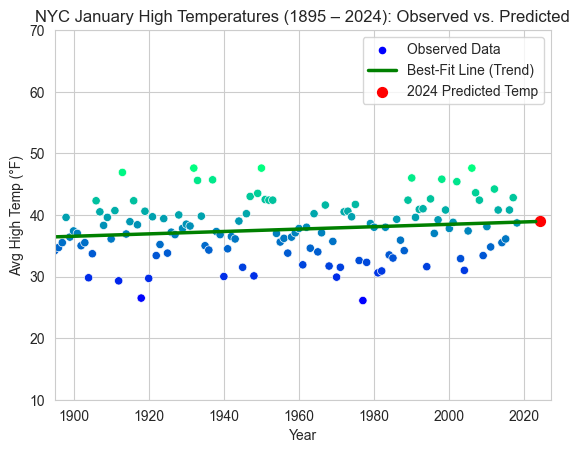

Predicted Average High Temperature for January 2024: 38.94°F


In [30]:
# Uses LinearRegression from sklearn.linear_model

# # Define the prediction function using the trained model
predict = lambda x: (linear_regression.coef_[0] * x + linear_regression.intercept_)

# Generate an extended range of years for the best-fit line
extended_years = np.arange(nyc_df.Date.min(), 2024)  

# Predicted temperatures for the extended years
predicted_temps = predict(extended_years)

# Set Seaborn style
sns.set_style('whitegrid')

# Create scatterplot for observed temperature data
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

# Legend entry for Observed Data
plt.scatter([], [], color="blue", s=20, label="Observed Data") 

# Plot the best-fit regression line (long term trend)
plt.plot(extended_years, predicted_temps, color='green', linestyle='-', linewidth=2.5, label="Best-Fit Line (Trend)")

# Predict and highlight 2024 using red dot
forecast_2024 = predict(2024)
plt.scatter(2024, forecast_2024, color='red', marker='o', s=50, label="2024 Predicted Temp")

# The x-coordinates of the regression line's start and end points
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)

# Set X and Y limits. Extend slightly past 2024 for clarity.
plt.xlim(nyc_df.Date.min(), 2027)  
plt.ylim(10, 70)

# Add Title & Labels
plt.title('NYC January High Temperatures (1895 – 2024): Observed vs. Predicted')  
plt.xlabel("Year")
plt.ylabel("Avg High Temp (°F)")

# Show legend
plt.legend()

# Show plot
plt.show()

# Print the predicted temperature for 2024
print(f"Predicted Average High Temperature for January 2024: {forecast_2024:.2f}°F")

# type(linear_regression)

## Part 4: Insights: Comparison of Predictive Models

When analyzing NYC January high temperatures, two different predictive approaches were used. This section discusses their similarities, differences, and performance in predicting future values.

🔹**Comparison of the Two Models**

| Feature                     | SciPy Linear Regression Model | Scikit-Learn Linear Regression Model |
|-----------------------------|-----------------------------|--------------------------------------|
| **Approach**                | Uses `stats.linregress()` to directly compute slope and intercept | Uses `train_test_split()` to train/test a regression model |
| **Best-Fit Line Calculation** | Manually applies `y = mx + b` using the returned slope and intercept | Uses `.fit()` method to determine `coef_` (slope) and `intercept_` dynamically |
| **Training Process**         | No explicit training split; uses all available data | Splits data into training and testing sets to validate performance |
| **Prediction Method**        | Directly calculates future values using computed regression equation | Uses `.predict()` method on new data points |
| **Visualization Differences** | Best-fit line plotted manually with Matplotlib (`plt.plot()`) | Best-fit line generated using Seaborn’s regression plot (`sns.regplot()`) |

🔹 **Comparison of 2024 Predictions**
| Model | Predicted Temperature for January 2024 |
|--------|---------------------------------|
| **SciPy Model** (`stats.linregress`) | `38.59°F` |
| **Scikit-Learn Model** (`LinearRegression`) | `38.94°F` |

🔹 **Key Similarities**
- Both models use linear regression to model the relationship between year and temperature
- Both models calculate a best-fit line based on historical data
- Both models predict the average high temperature for January 2024
- Both models visualize the trend using Seaborn and Matplotlib

🔹 **Key Differences**
- SciPy’s stats.linregress() method is a simpler, statistical approach that directly computes slope and intercept without splitting data into training and testing sets.
- Scikit-Learn’s Linear Regression model follows a supervised learning approach, splitting data into training and testing sets before making predictions.
- Prediction Method: The SciPy approach manually applies y = mx + b, while Scikit-Learn’s model makes predictions using .predict().
- Visualization: The SciPy model plots the trend manually with plt.plot(), while Scikit-Learn uses Seaborn’s regression plot (sns.regplot()), which includes confidence intervals.

🔹 **Conclusion**
- Both the SciPy and Scikit-Learn models predict a similar average high temperature for January 2024, differing by only 0.35°F. This indicates that both methods are effective in modeling long-term temperature trends. The slight variation arises from differences in implementation and numerical optimization techniques between the two libraries. While SciPy provides a quick and straightforward regression solution, Scikit-Learn is more flexible for machine learning applications and can be extended with additional features such as regularization.
- If the goal is quick analysis, the SciPy model is a good choice because it doesn’t require splitting data into training/testing sets.
- If the goal is a more robust predictive model, the Scikit-Learn approach is preferred, as it accounts for training and validation performance.